In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


# Cargar el dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes.csv')

# Mostrar las primeras 5 filas del dataset
print("Primeras 5 filas del dataset:")
print(df.head())

# Mostrar información básica del dataset
print("\nInformación del Dataset:")
df.info()

Mounted at /content/drive
Primeras 5 filas del dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pr

In [ ]:
# Columnas con valores cero que deben ser tratados
cols_to_treat = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Reemplazar los 0 con NaN (Not a Number) para facilitar el cálculo de la media
for col in cols_to_treat:
    df[col] = df[col].replace(0, np.nan)

# Rellenar los valores NaN con la media de cada columna
for col in cols_to_treat:
    df[col].fillna(df[col].mean(), inplace=True)

# Verificar que no queden ceros en las columnas tratadas
print("\nDescripción del dataset después de imputar los ceros:")
print(df[cols_to_treat].describe())


Descripción del dataset después de imputar los ceros:
          Glucose  BloodPressure  SkinThickness     Insulin         BMI
count  768.000000     768.000000     768.000000  768.000000  768.000000
mean   121.686763      72.405184      29.153420  155.548223   32.457464
std     30.435949      12.096346       8.790942   85.021108    6.875151
min     44.000000      24.000000       7.000000   14.000000   18.200000
25%     99.750000      64.000000      25.000000  121.500000   27.500000
50%    117.000000      72.202592      29.153420  155.548223   32.400000
75%    140.250000      80.000000      32.000000  155.548223   36.600000
max    199.000000     122.000000      99.000000  846.000000   67.100000


/tmp/ipython-input-2-2830184755.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [ ]:
# Separar características (X) y variable objetivo (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Dividir el dataset en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Escalar los datos
# Es importante ajustar el escalador solo con los datos de entrenamiento para evitar fuga de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nForma de X_train: {X_train.shape}")
print(f"Forma de X_test: {X_test.shape}")


Forma de X_train: (614, 8)
Forma de X_test: (154, 8)


--- Logistic Regression ---
Accuracy: 0.6948
              precision    recall  f1-score   support

           0       0.74      0.81      0.78       100
           1       0.58      0.48      0.53        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154



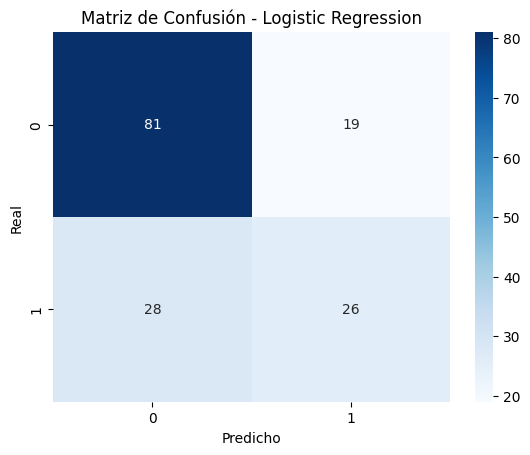

--- K-Nearest Neighbors ---
Accuracy: 0.7338
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       100
           1       0.62      0.63      0.62        54

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



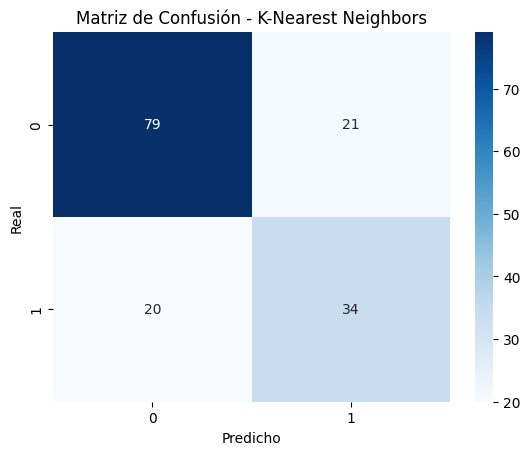

--- Decision Tree ---
Accuracy: 0.6688
              precision    recall  f1-score   support

           0       0.72      0.79      0.76       100
           1       0.53      0.44      0.48        54

    accuracy                           0.67       154
   macro avg       0.63      0.62      0.62       154
weighted avg       0.66      0.67      0.66       154



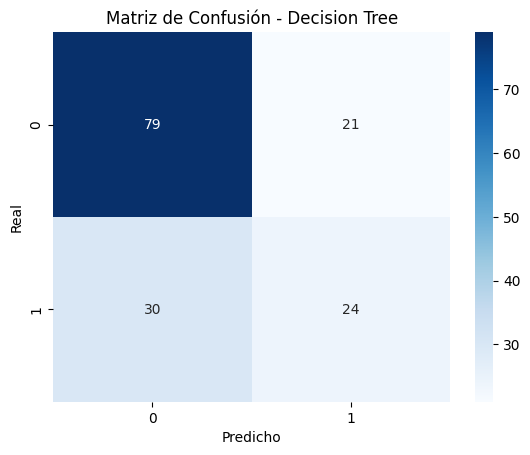

--- Gaussian NB ---
Accuracy: 0.6948
              precision    recall  f1-score   support

           0       0.78      0.73      0.76       100
           1       0.56      0.63      0.59        54

    accuracy                           0.69       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.71      0.69      0.70       154



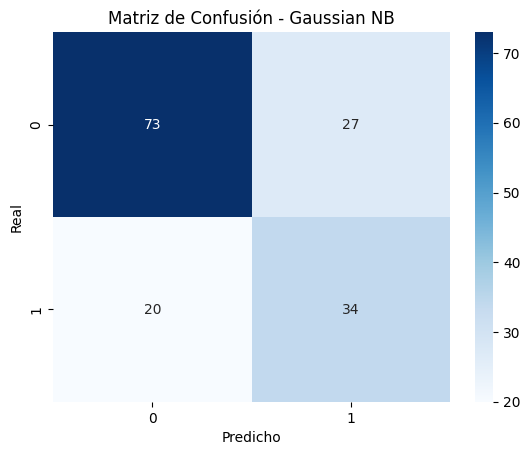

--- LDA ---
Accuracy: 0.6948
              precision    recall  f1-score   support

           0       0.74      0.81      0.78       100
           1       0.58      0.48      0.53        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154



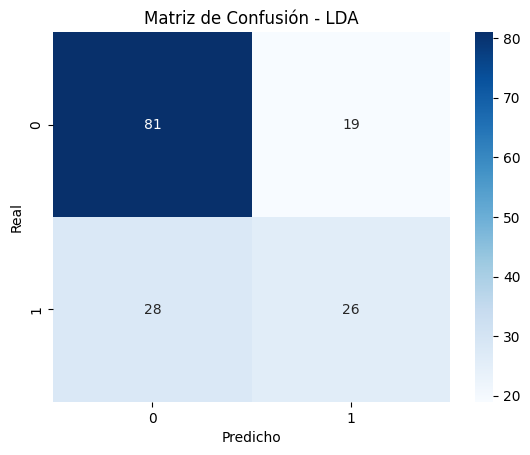

--- Random Forest ---
Accuracy: 0.7792
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       100
           1       0.71      0.63      0.67        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.78      0.78      0.78       154



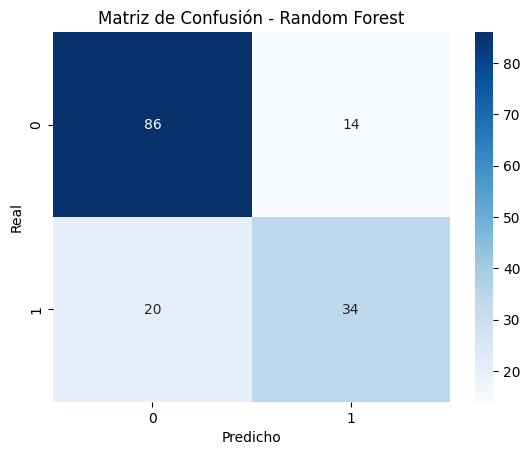

--- Extra Trees ---
Accuracy: 0.7532
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       100
           1       0.67      0.59      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



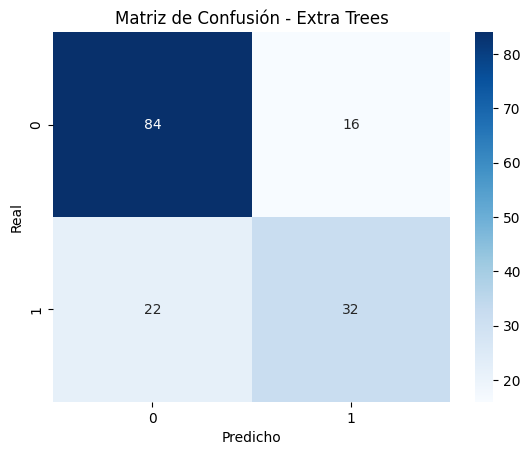

--- AdaBoost ---
Accuracy: 0.7468
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       100
           1       0.66      0.57      0.61        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.75      0.74       154



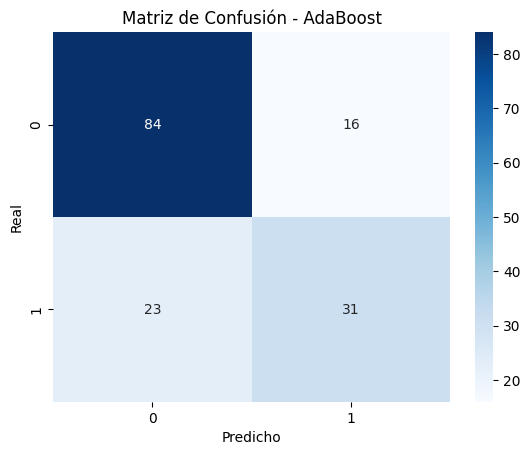

--- Gradient Boost ---
Accuracy: 0.7662
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       100
           1       0.70      0.59      0.64        54

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154



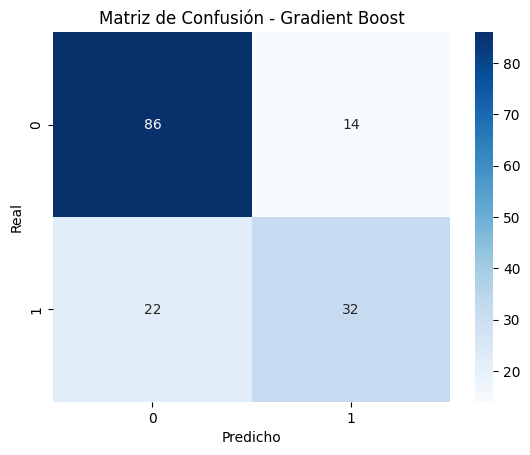

--- Bagging ---
Accuracy: 0.7208
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       100
           1       0.65      0.44      0.53        54

    accuracy                           0.72       154
   macro avg       0.70      0.66      0.66       154
weighted avg       0.71      0.72      0.71       154



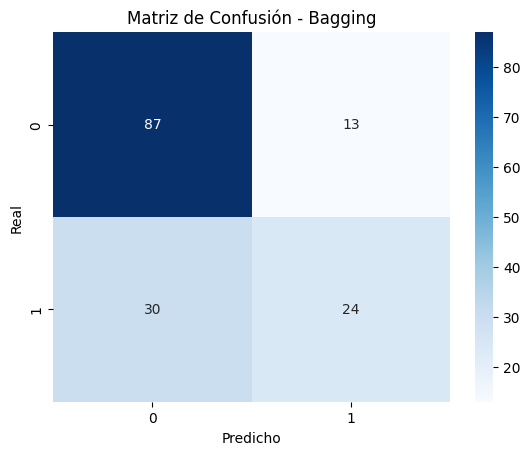

--- Perceptron ---
Accuracy: 0.6948
              precision    recall  f1-score   support

           0       0.77      0.76      0.76       100
           1       0.56      0.57      0.57        54

    accuracy                           0.69       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.70      0.69      0.70       154



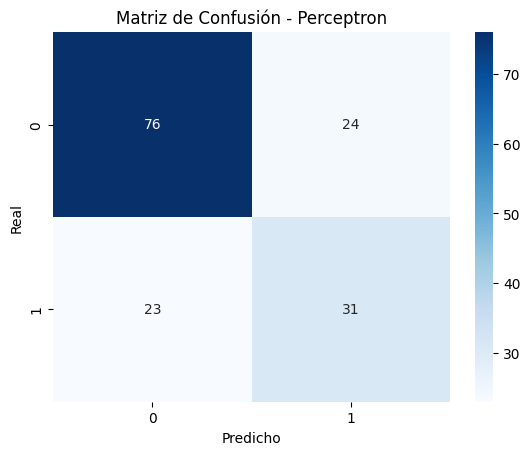

--- SVC ---
Accuracy: 0.7338
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       100
           1       0.64      0.54      0.59        54

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.69       154
weighted avg       0.73      0.73      0.73       154



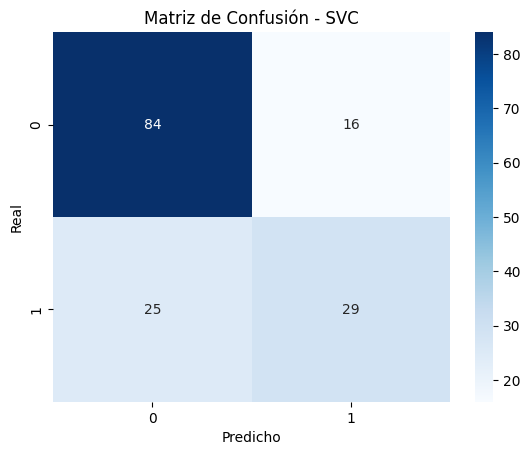

In [ ]:
# Importar todos los clasificadores necesarios
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Definir los modelos a entrenar
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gaussian NB": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boost": GradientBoostingClassifier(random_state=42),
    "Bagging": BaggingClassifier(random_state=42),
    "Perceptron": Perceptron(random_state=42),
    "SVC": SVC(random_state=42)
}

# Entrenar, predecir y evaluar cada modelo
results = {}
for name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train_scaled, y_train)

    # Hacer predicciones
    y_pred = model.predict(X_test_scaled)

    # Calcular la precisión
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {name}')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.show()

--- Comparación de Precisión de los Modelos ---
              Algorithm  Accuracy
5         Random Forest  0.779221
8        Gradient Boost  0.766234
6           Extra Trees  0.753247
7              AdaBoost  0.746753
11                  SVC  0.733766
1   K-Nearest Neighbors  0.733766
9               Bagging  0.720779
0   Logistic Regression  0.694805
4                   LDA  0.694805
3           Gaussian NB  0.694805
10           Perceptron  0.694805
2         Decision Tree  0.668831


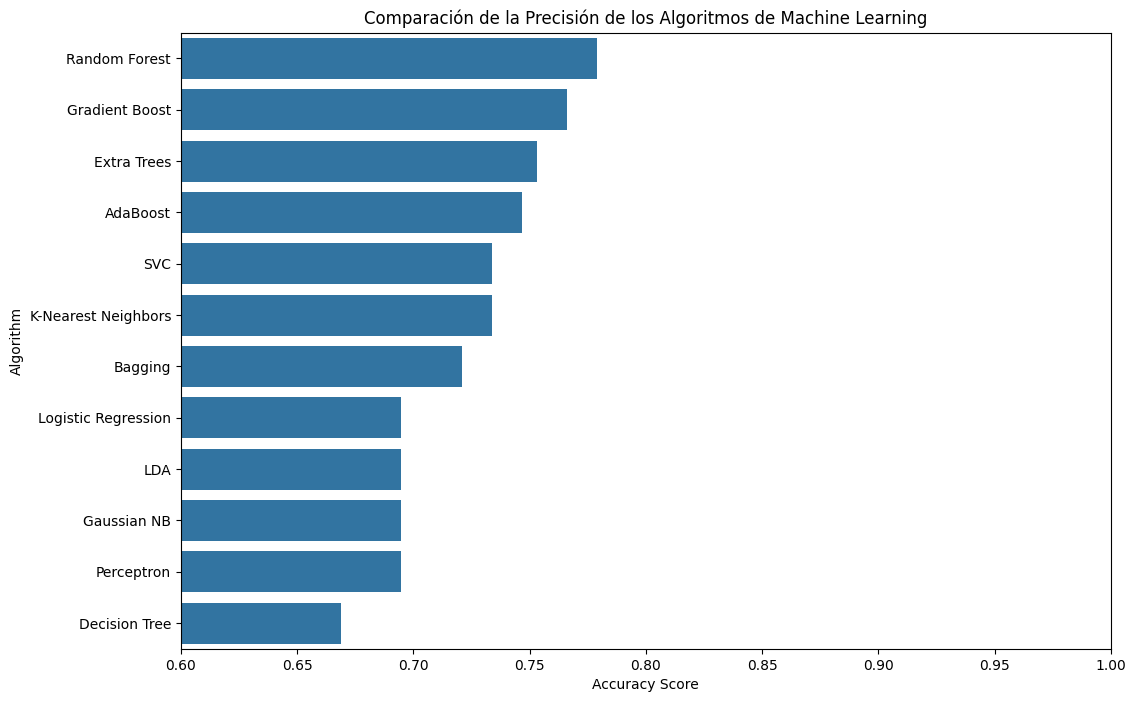

In [ ]:
# Convertir los resultados a un DataFrame de pandas para visualizarlos
results_df = pd.DataFrame(list(results.items()), columns=['Algorithm', 'Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)

print("--- Comparación de Precisión de los Modelos ---")
print(results_df)

# Graficar los resultados
plt.figure(figsize=(12, 8))
sns.barplot(x='Accuracy', y='Algorithm', data=results_df)
plt.xlabel('Accuracy Score')
plt.ylabel('Algorithm')
plt.title('Comparación de la Precisión de los Algoritmos de Machine Learning')
plt.xlim(0.6, 1.0)
plt.show()